Exploratory Data Analysis + Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

### EDA and cleaning on `train.csv`

In [2]:
train_original = pd.read_csv('train.csv')
train_original.drop('Unnamed: 0', inplace=True, axis=1)
train_original.drop('id', inplace=True, axis=1)
train_original.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Check na

In [3]:
train_original.shape

(103904, 23)

In [4]:
sum(pd.isna(train_original['satisfaction']))

0

Gender: Distribution and Categorical Conversion

<AxesSubplot:>

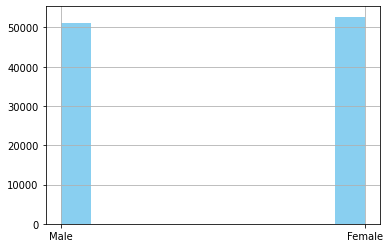

In [5]:
train_original['Gender'].hist(color='#89CFF0')

In [6]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
train_original['Gender'] = train_original['Gender'].apply(transform_gender)

Customer Type: Distribution and Categorical Conversion

<AxesSubplot:>

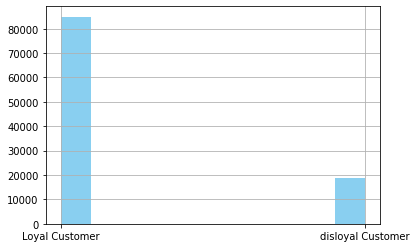

In [7]:
train_original['Customer Type'].hist(color='#89CFF0')

In [8]:
def transform_custype(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
train_original['Customer Type'] = train_original['Customer Type'].apply(transform_custype)

Type of Travel: Distribution and Categorical Conversion

<AxesSubplot:>

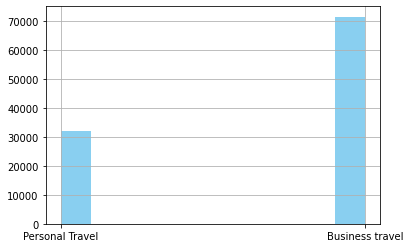

In [9]:
train_original['Type of Travel'].hist(color='#89CFF0')

In [10]:
def transform_tvltype(x):
    if x == 'Personal Travel':
        return 1
    elif x == 'Business travel':
        return 0
train_original['Type of Travel'] = train_original['Type of Travel'].apply(transform_tvltype)

satisfaction (Target Variable): Distribution and Categorical Conversion (Balanced Data)

<AxesSubplot:>

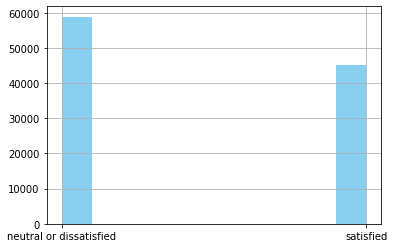

In [11]:
train_original['satisfaction'].hist(color='#89CFF0')

In [12]:
def transform_tgt(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
train_original['satisfaction'] = train_original['satisfaction'].apply(transform_tgt)

Class: Distribution and Categorical Conversion

<AxesSubplot:>

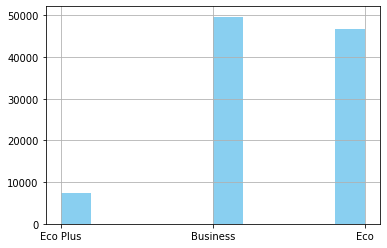

In [13]:
train_original['Class'].hist(color='#89CFF0')

In [14]:
col = ['Class']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(train_original[['Class']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(col))

train_cleaned = pd.concat([train_original, one_hot_df], axis=1)
train_cleaned = train_cleaned.drop(col, axis=1)

train_cleaned.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,1,460,3,4,3,1,5,...,4,4,5,5,25,18.0,0,0.0,0.0,1.0
1,0,0,25,0,235,3,2,3,3,1,...,3,1,4,1,1,6.0,0,1.0,0.0,0.0
2,1,1,26,0,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1.0,0.0,0.0
3,1,1,25,0,562,2,5,5,5,2,...,3,1,4,2,11,9.0,0,1.0,0.0,0.0
4,0,1,61,0,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1.0,0.0,0.0


Check for variable correlations

`Departure Delay in Minutes` and `Arrival Delay in Minutes` are strongly correlated. It makes sense to only user one of them.

Obseration 1: Some of the "service quality" features are positively correlated, for example, `Inflight wifi service` and `Ease of online booking`.

In [15]:
train_corr =  train_cleaned.corr()

train_corr =  train_corr.unstack()

corr_rank = train_corr.reindex(train_corr.abs().sort_values(ascending=False).index)

corr_rank = corr_rank[corr_rank.values != 1].reset_index()

corr_rank[::2].head()

,level_0,level_1,0
0,Departure Delay in Minutes,Arrival Delay in Minutes,0.965481
2,Class_Business,Class_Eco,-0.865356
4,Inflight wifi service,Ease of Online booking,0.715856
6,Inflight entertainment,Cleanliness,0.691815
8,Cleanliness,Seat comfort,0.678534


In [16]:
# drop arrival
train_cleaned = train_cleaned.drop('Arrival Delay in Minutes', axis=1)

In [17]:
# train_cleaned.to_csv('train_cleaned.csv')

### Cleaning on `test.csv`

In [18]:
test_original = pd.read_csv('test.csv')
test_original.drop('Unnamed: 0', inplace=True, axis=1)
test_original.drop('id', inplace=True, axis=1)
test_original.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [19]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
test_original['Gender'] = test_original['Gender'].apply(transform_gender)

def transform_custype(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
test_original['Customer Type'] = test_original['Customer Type'].apply(transform_custype)

def transform_tvltype(x):
    if x == 'Personal Travel':
        return 1
    elif x == 'Business travel':
        return 0
test_original['Type of Travel'] = test_original['Type of Travel'].apply(transform_tvltype)

def transform_tgt(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
test_original['satisfaction'] = test_original['satisfaction'].apply(transform_tgt)

In [20]:
col = ['Class']

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(test_original[['Class']])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(col))

test_cleaned = pd.concat([test_original, one_hot_df], axis=1)
test_cleaned = test_cleaned.drop(col, axis=1)

test_cleaned.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,52,0,160,5,4,3,4,3,...,5,2,5,5,50,44.0,1,0.0,1.0,0.0
1,1,1,36,0,2863,1,1,3,1,5,...,4,3,4,5,0,0.0,1,1.0,0.0,0.0
2,0,0,20,0,192,2,0,2,4,2,...,3,2,2,2,0,0.0,0,0.0,1.0,0.0
3,0,1,44,0,3377,0,0,0,2,3,...,1,3,1,4,0,6.0,1,1.0,0.0,0.0
4,1,1,49,0,1182,2,3,4,3,4,...,2,4,2,4,0,20.0,1,0.0,1.0,0.0


In [21]:
# drop arrival
test_cleaned = test_cleaned.drop('Arrival Delay in Minutes', axis=1)

In [22]:
# test_cleaned.to_csv('test_cleaned.csv')

In [23]:
train_cleaned.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'satisfaction', 'Class_Business',
       'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

### Correlation

In [24]:
train_corr = train_cleaned.corr()
train_corr

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
Gender,1.000000,-0.031732,-0.008928,-0.006909,-0.005828,-0.008974,-0.009142,-0.006951,-0.000333,-0.005772,...,-0.031798,-0.037391,-0.010563,-0.039410,-0.006505,-0.002935,-0.012211,-0.010634,0.005295,0.010351
Customer Type,-0.031732,1.000000,0.281674,0.308333,0.225200,0.007543,0.206869,0.019509,-0.006078,0.059454,...,0.047868,-0.024723,0.032177,-0.022670,0.083613,-0.004036,0.187638,0.085601,-0.118694,0.062967
Age,-0.008928,0.281674,1.000000,-0.048524,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,...,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,0.137167,0.138939,-0.132551,-0.013376
Type of Travel,-0.006909,0.308333,-0.048524,1.000000,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,...,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.449000,-0.552125,0.500938,0.102775
Flight Distance,-0.005828,0.225200,0.099461,-0.267344,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,...,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,0.298780,0.466896,-0.404493,-0.123674
Inflight wifi service,-0.008974,0.007543,0.017859,-0.105085,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,...,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,0.284245,0.032885,-0.037197,0.008034
Departure/Arrival time convenient,-0.009142,0.206869,0.038125,0.259763,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,...,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.051601,-0.096870,0.082321,0.028740
Ease of Online booking,-0.006951,0.019509,0.024842,-0.133511,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,...,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,0.171705,0.107436,-0.098039,-0.018914
Gate location,-0.000333,-0.006078,-0.001330,-0.030700,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,...,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.000682,0.004526,-0.003488,-0.002031
Food and drink,-0.005772,0.059454,0.023000,-0.063439,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,...,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,0.209936,0.087114,-0.078801,-0.016671


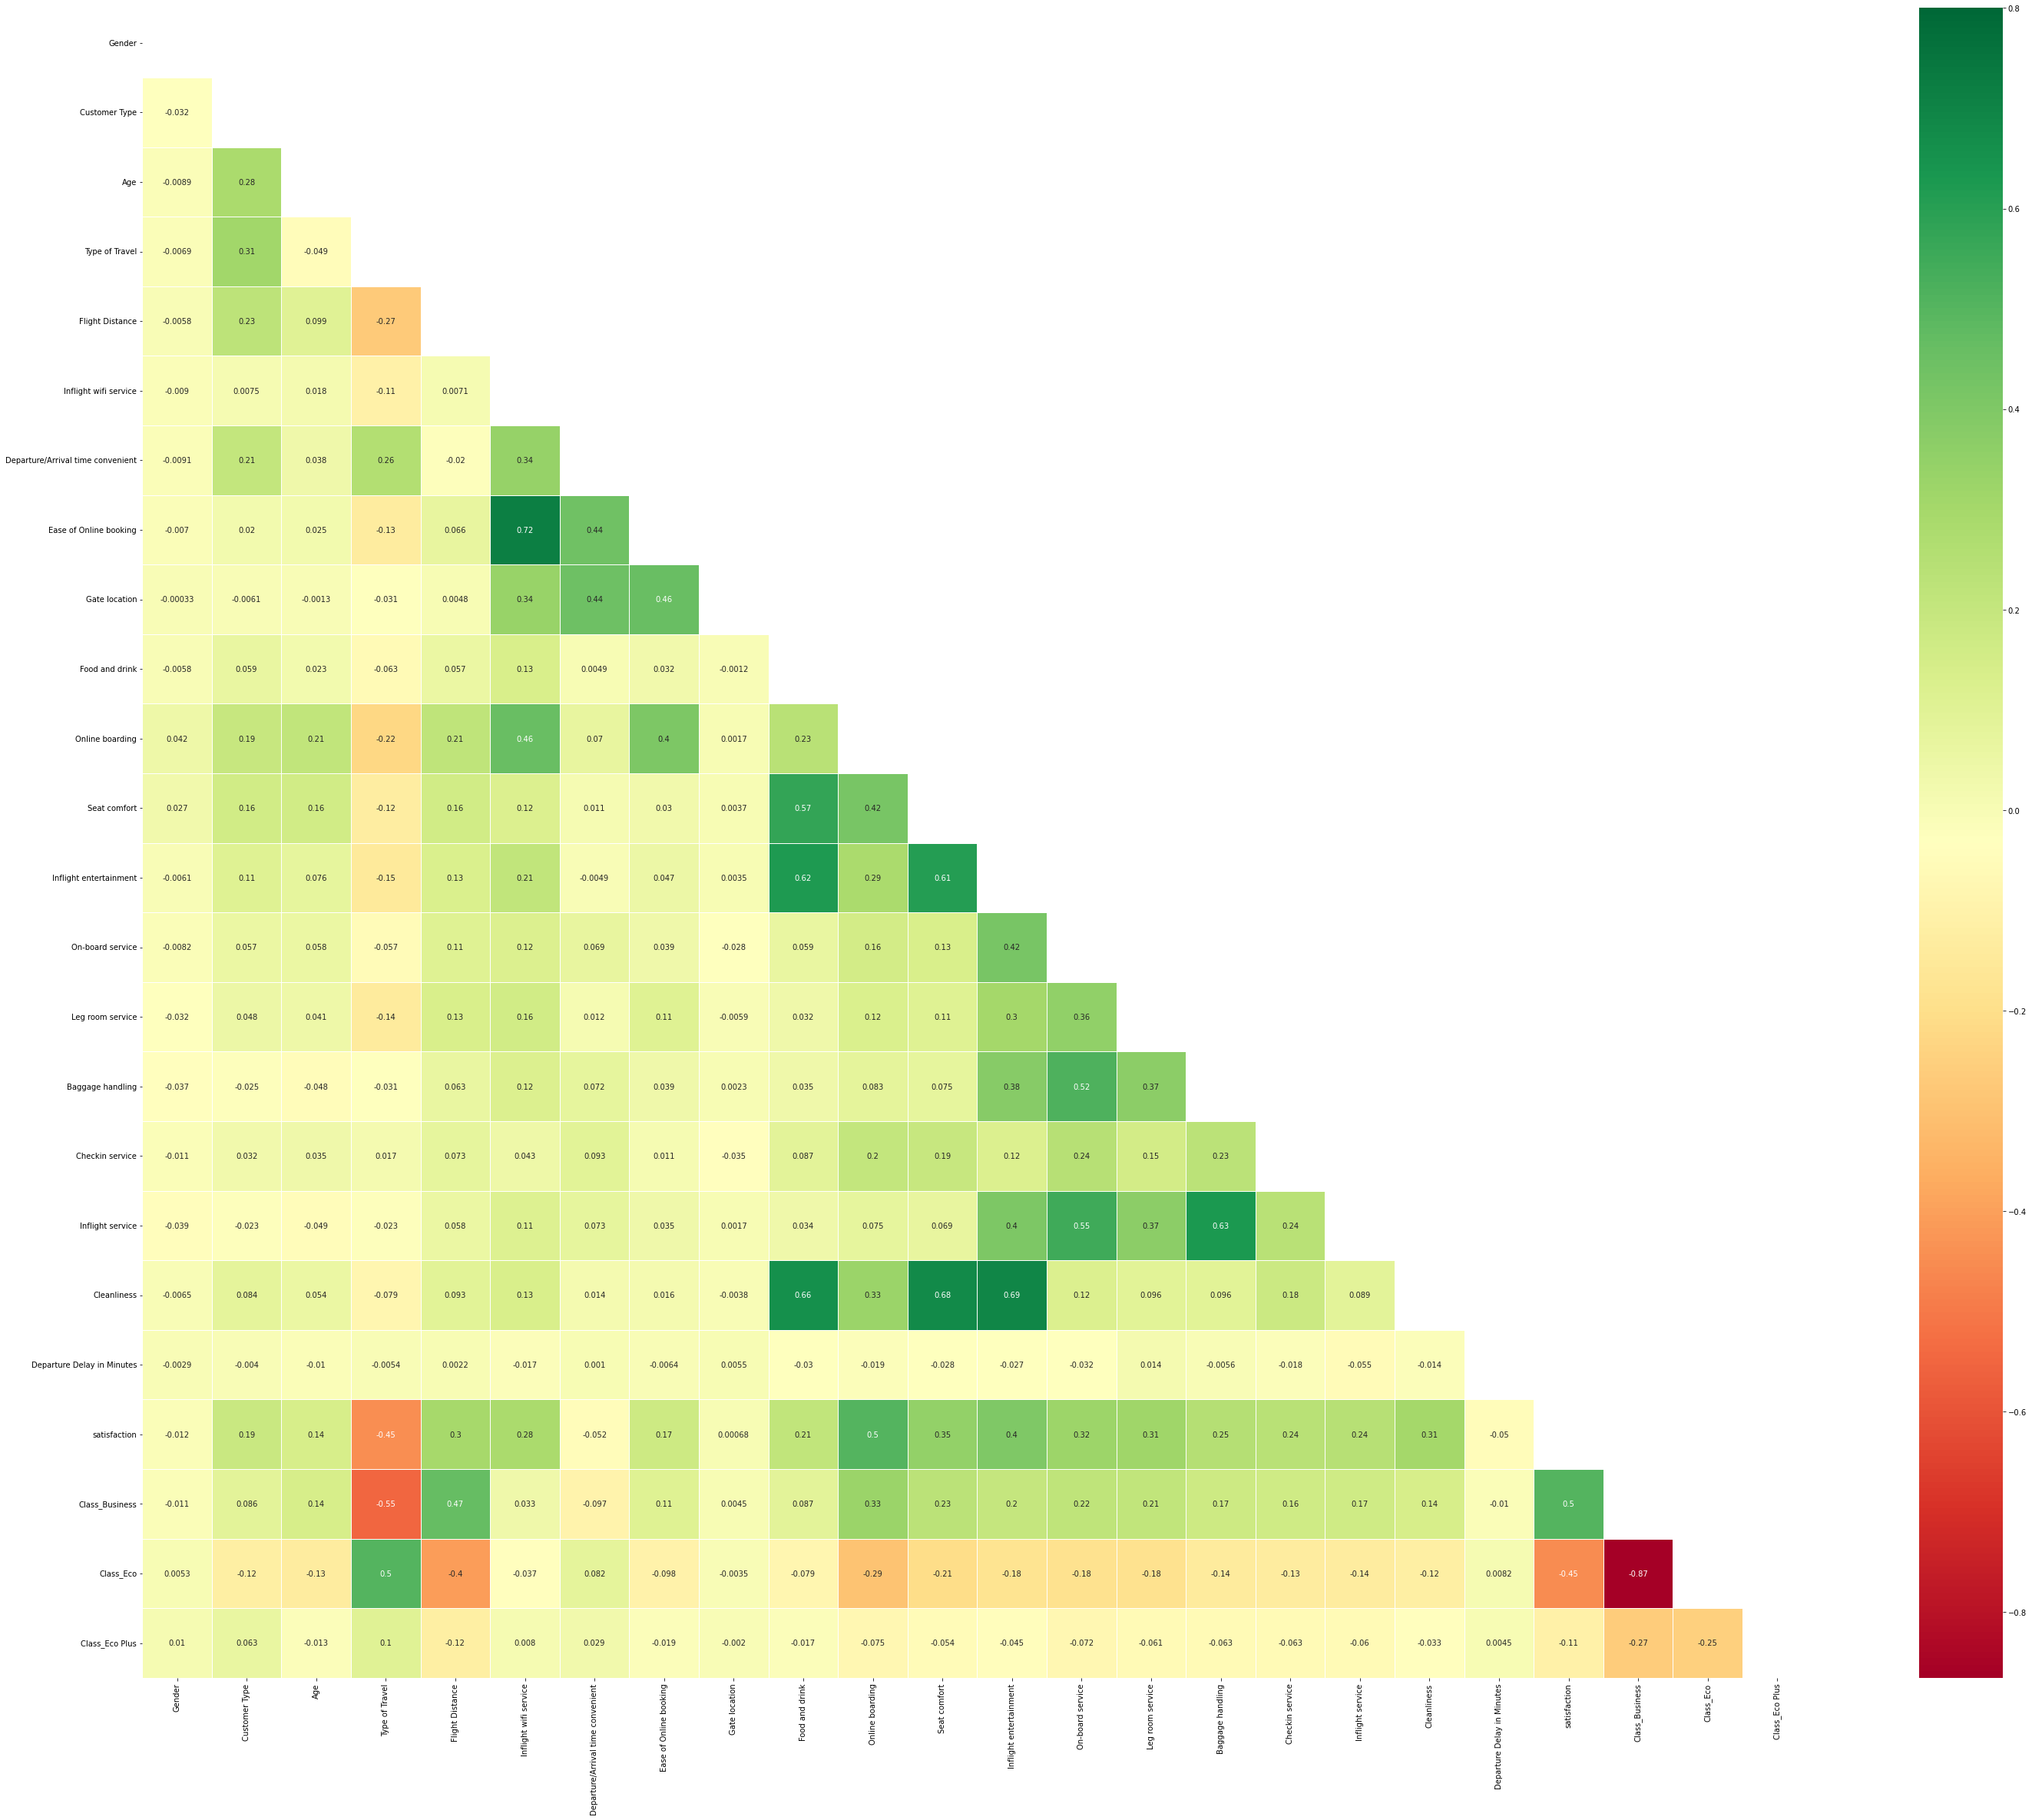

In [31]:
corr = train_corr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 40))  # Adjust the figure size if needed

sns.heatmap(corr, vmax=0.8, square=True, annot=True, mask=mask, cmap="RdYlGn", linewidths=.5)
plt.show()

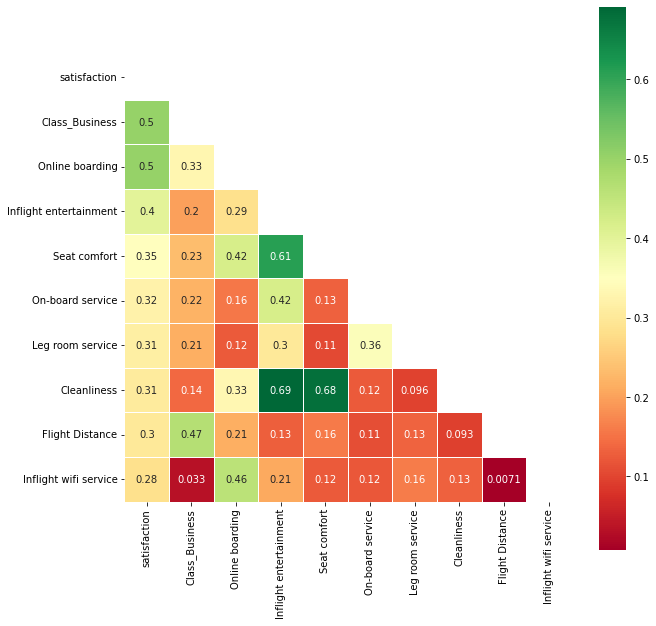

In [26]:
# heatmap of the correlation matrix for the top 10 variables most closely correlated with 'satisfaction'
k = 10
cols = train_corr.nlargest(k, 'satisfaction')['satisfaction'].index
corr = train_cleaned[cols].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, mask=mask, cmap="RdYlGn", square=True, linewidths=.5)

plt.show()